In [ ]:
import zipfile
import os

def unzip_file(zip_filepath, extract_dir):
  try:
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
    print(f"Successfully unzipped '{zip_filepath}' to '{extract_dir}'")
  except FileNotFoundError:
    print(f"Error: File '{zip_filepath}' not found.")
  except zipfile.BadZipFile:
    print(f"Error: '{zip_filepath}' is not a valid zip file.")
  except Exception as e:
    print(f"An error occurred: {e}")


zip_file_path = 'yelp_academic_dataset_tip.json.zip'
extract_directory = 'data'

# Check if the extract directory exists, if not create it
if not os.path.exists(extract_directory):
    os.makedirs(extract_directory)

unzip_file(zip_file_path, extract_directory)

Successfully unzipped 'yelp_academic_dataset_tip.json.zip' to 'data'


In [ ]:
text_data

['Avengers time with the ladies.',
 'They have lots of good deserts and tasty cuban sandwiches',
 "It's open even when you think it isn't",
 'Very decent fried chicken',
 'Appetizers.. platter special for lunch',
 'Chili Cup + Single Cheeseburger with onion, pickle, and relish + Vanilla Coca-Cola...so far.',
 "Saturday, Dec 7th 2013, ride Patco's Silver Sleigh w/ Santa & his elves on a decorated train into Center City. Trains leave from Lindenwold at 10am, 11:15am, & 12:30pm, and make all stops. Great for kids!",
 'This is probably the best place in the cool Springs area to watch a game and eat',
 'Tacos',
 'Starbucks substitute in boring downtown Tampa. Ugh. Never again!',
 'Order the Tortilla Soup',
 'Very good will definitely be coming back!!',
 'If the Hotlight is on you must stop in.',
 "Let's go Yankees!",
 "Basically same food as rally's for $5 more",
 "Don't go for dinner. They close at 6. Really Yvonne L? Negative stars for a restaurant where you you didn't and never intended 

# preprocess data function from slide

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
en_stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def process_text(document):
 document = re.sub(r'\s+', ' ', document, flags=re.I)  # Remove extra white space from text
 document = re.sub(r'\W', ' ', str(document))   # Remove all the special characters from text
 document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)     # Remove all single characters from text
 document = document.lower()    # Converting to Lowercase
 # Word tokenization
 tokens = document.split()
 # Drop words
 tokens = [word for word in tokens if len(word) > 3]
 lemma_txt = [lemmatizer.lemmatize(word) for word in tokens]
 lemma_no_stop_txt = [word for word in lemma_txt if word not in en_stop]
 clean_txt = ' '.join(lemma_no_stop_txt)
 return clean_txt

In [ ]:
cleaned_line = process_text(text_data[0])
print(cleaned_line)

avenger time lady


In [ ]:
cleaned_document = []
for i in range(len(text_data)):
    text_data[i] = process_text(text_data[i])
    cleaned_document.append(text_data[i])

for i in range(5):
    print(cleaned_document[i])

avenger time lady
lot good desert tasty cuban sandwich
open even think
decent fried chicken
appetizer platter special lunch


In [ ]:
!pip install gensim

# Step-1

In [ ]:
from gensim.models.fasttext import FastText # build and train Fast Text model
from gensim.models import Word2Vec  # to Save and Load Word2Vec models
from gensim.models.fasttext import load_facebook_model

In [ ]:
def train_Fasttext(word_tokens,embedding_size,window_size,min_word,down_sampling,Save_model_filename):
 fast_Text_model = FastText(word_tokens,
      vector_size=embedding_size,       # Dimensionality of the word vectors. ,
      window=window_size,
      min_count=min_word,        # The model ignores all words with total frequency lower than this.
      sample=down_sampling,      # threshold which higher-frequency words are randomly down sampled
      workers = 4,               # Num  threads to train the model (faster training with multicore comp.)
      sg=1,                      # Training algorithm: skip-gram if sg=1, otherwise CBOW.
      epochs=1)                  # Number of iterations (epochs) over the corpus


 fast_Text_model.save(Save_model_filename)   # Save fastText gensim model

In [ ]:
cleaned_document

['avenger time lady',
 'lot good desert tasty cuban sandwich',
 'open even think',
 'decent fried chicken',
 'appetizer platter special lunch',
 'chili single cheeseburger onion pickle relish vanilla coca cola',
 'saturday 2013 ride patco silver sleigh santa elf decorated train center city train leave lindenwold 10am 15am 30pm make stop great kid',
 'probably best place cool spring area watch game',
 'taco',
 'starbucks substitute boring downtown tampa never',
 'order tortilla soup',
 'good definitely coming back',
 'hotlight must stop',
 'yankee',
 'basically food rally',
 'dinner close really yvonne negative star restaurant never intended',
 'min take right right tight',
 'grilled chicken entree delicious small portion like environment sure though',
 'bomb love dish like',
 'helping mona find phone',
 'eating breakfast',
 'order crispy bake good',
 'crepe please',
 'pimento cheese taste great large portion starter great sharing fried pickle also awesome',
 'good used place west coast

In [ ]:
# selected values for Training parameters
embedding_size = 300
window_size = 5
min_word = 5
down_sampling = 1e-2

sentences = [sentence.split() for sentence in cleaned_document]

train_Fasttext(sentences,embedding_size,window_size,min_word,down_sampling,'fasttext_model.bin')

In [ ]:
model_file_name = 'fasttext_model.bin'
# Load saved gensim fastText model
fast_Text_model = Word2Vec.load(model_file_name)

In [ ]:
# Check word embedding
test_word="good"
print(fast_Text_model.wv[test_word])

[-1.01948097e-01  9.21913162e-02 -7.38949701e-02  4.14365269e-02
 -1.30557343e-01 -6.72454387e-02 -1.08530670e-01  1.97501659e-01
  3.31263244e-02  4.80119437e-02 -1.14289492e-01 -6.22126721e-02
 -1.22005947e-01  7.88578317e-02 -2.94185150e-02 -1.91448312e-02
  4.92935739e-02 -5.00562228e-02 -1.27979234e-01  3.64946201e-02
  4.27194983e-02 -5.75370900e-02 -4.37612385e-02 -5.03107131e-01
 -5.91896661e-02 -7.72132427e-02 -5.62620051e-02 -9.51665193e-02
 -9.84686092e-02  3.64730577e-03 -2.97116339e-02 -1.78391546e-01
 -4.91869487e-02  2.08343267e-01 -2.56308943e-01  6.02982892e-03
  2.03512862e-01 -3.18583697e-01 -1.38082623e-01  1.33113256e-02
  4.89951581e-01 -1.20685339e-01  1.29762620e-01 -4.82922375e-01
 -1.12182401e-01 -1.98435605e-01 -3.34330529e-01  1.41617388e-01
 -1.07597187e-01  3.86312395e-01  2.92039514e-01 -3.36928219e-02
  3.07584386e-02  2.72839814e-01 -4.02354926e-01  1.23289235e-01
 -1.87912598e-01 -2.19195914e-02 -2.61675715e-01  8.76240209e-02
  1.25692323e-01  6.77246

In [ ]:
# Check top 10 similar word
print(fast_Text_model.wv.most_similar(test_word, topn=10))

[('goood', 0.9206746816635132), ('goodfood', 0.9017444849014282), ('gooood', 0.8863402009010315), ('mood', 0.8771068453788757), ('greatfood', 0.87578284740448), ('gooodddd', 0.8735988736152649), ('solid', 0.8722477555274963), ('decent', 0.8701421022415161), ('foood', 0.8663698434829712), ('fooood', 0.8636626601219177)]


opposite direction in the embedding space

In [ ]:
opposite_vector = -fast_Text_model.wv[test_word]
fast_Text_model.wv.similar_by_vector(opposite_vector, topn=10)

[('http', -0.3079439401626587),
 ('address', -0.3396201729774475),
 ('tour', -0.35332515835762024),
 ('directtv', -0.35605013370513916),
 ('haiku', -0.3570405840873718),
 ('direct', -0.3622020483016968),
 ('nola_haiku', -0.3716019093990326),
 ('enter', -0.37533125281333923),
 ('nation', -0.37909284234046936),
 ('exhibit', -0.3801977336406708)]

another word

In [ ]:
# Check word embedding
test_word="love"
print(fast_Text_model.wv[test_word])

[-1.21643379e-01  2.00976893e-01  1.54553160e-01 -1.30636310e-02
 -7.53376901e-01 -3.02846402e-01 -1.94890484e-01  1.65176332e-01
 -2.56834049e-02  1.84081063e-01 -3.93984020e-01 -5.24311662e-02
 -2.15255439e-01  1.46794319e-01  3.68947834e-02  2.70565778e-01
  1.86492968e-02  4.35450822e-02 -1.53674617e-01 -1.80396765e-01
 -1.56940222e-02  1.60564467e-01  1.07653528e-01 -5.75815797e-01
  2.17025861e-01  1.17030948e-01 -8.46255920e-04  6.53887540e-02
  2.44467854e-02 -1.47773802e-01  7.54410699e-02 -2.56084710e-01
 -1.10435680e-01  1.04676157e-01  7.30204433e-02  8.57532769e-02
  4.64260094e-02 -7.14801326e-02 -1.40548736e-01 -6.29002824e-02
  2.86676854e-01 -1.39533028e-01  1.37926610e-02 -2.94430614e-01
 -8.97729248e-02  6.26316145e-02 -1.35786429e-01  2.42356628e-01
 -1.01130418e-01  1.48400411e-01  2.83510089e-01  3.14937271e-02
  6.75590336e-02  3.03980500e-01 -1.49953708e-01  5.07430807e-02
 -1.52442828e-01  1.97095066e-01 -5.61171770e-02  6.72961548e-02
  7.53550529e-02  4.59901

In [ ]:
# Check top 10 similar word
print(fast_Text_model.wv.most_similar(test_word, topn=10))

[('loveee', 0.9140724539756775), ('loveeee', 0.9065263867378235), ('loveeeee', 0.8997541069984436), ('lovey', 0.8944791555404663), ('loveeeeee', 0.8918474316596985), ('loveeeeeee', 0.884734570980072), ('lovelovelove', 0.8803894519805908), ('lovin', 0.8747254610061646), ('loveseat', 0.8396313786506653), ('loooove', 0.8180338740348816)]


opposite direction in the embedding space

In [ ]:
opposite_vector = -fast_Text_model.wv[test_word]
fast_Text_model.wv.similar_by_vector(opposite_vector, topn=10)

[('tour', -0.3334912955760956),
 ('room', -0.3399125933647156),
 ('parking', -0.3402062952518463),
 ('http', -0.3560018837451935),
 ('ticket', -0.35749590396881104),
 ('reservation', -0.36178556084632874),
 ('cancel', -0.36381056904792786),
 ('review', -0.3701244592666626),
 ('card', -0.37128838896751404),
 ('traffic', -0.3724181354045868)]

Using Predefined Antonym Dictionary instead of opposite direction

In [ ]:
from nltk.corpus import wordnet

def get_antonyms(word):
    antonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                antonyms.add(lemma.antonyms()[0].name())
    return list(antonyms)

print(get_antonyms("love"))

['hate']


In [ ]:
for ant in get_antonyms(test_word):
    print(f"Antonym: {ant}")
    print(fast_Text_model.wv.most_similar(ant, topn=10))

Antonym: hate
[('hateful', 0.8770875930786133), ('hat', 0.8605912327766418), ('ghetto', 0.8514169454574585), ('shithole', 0.8500967025756836), ('hahah', 0.8498167395591736), ('hater', 0.8476150631904602), ('dumb', 0.8469064831733704), ('hatha', 0.8464382290840149), ('obnoxiously', 0.8462977409362793), ('stupid', 0.8460859060287476)]


# Step-2

In [ ]:
!pip install fasttext gensim

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz  # Unzip the filen

--2025-04-13 14:48:23--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.126, 18.238.176.19, 18.238.176.44, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G  58.4MB/s    in 38s     

2025-04-13 14:49:02 (112 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]

gzip: cc.en.300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
import fasttext

model = fasttext.load_model("cc.en.300.bin")

In [ ]:
word = "good"
# Get top 10 similar words
similar_words = model.get_nearest_neighbors(word, k=10)
print("Top 10 similar words to 'love':")
for score, w in similar_words:
    print(f"{w}: {score:.4f}")

Top 10 similar words to 'love':
bad: 0.7518
great: 0.7426
decent: 0.7300
nice: 0.7124
Good: 0.6797
excellent: 0.6737
goood: 0.6696
ggod: 0.6602
semi-good: 0.6479
good.Good: 0.6418


In [ ]:
def get_similar_words(word, top_n=10):
    nearest_neighbors = model.get_nearest_neighbors(word, k=top_n)
    similar_words = [neighbor[1] for neighbor in nearest_neighbors]
    return similar_words

similar_words_to_love = get_similar_words("love", top_n=10)
print("Top 10 similar words to 'love':")
print(similar_words_to_love)

Top 10 similar words to 'love':
['adore', 'looooooooove', 'loooove', 'loooooove', 'looooove', 'loooooooove', 'looooooove', 'LOVE', 'looove', 'loooooooooove']


In [ ]:
# model = fasttext.load_model("cc.en.300.bin")

def get_opposite_words(word, model, topn=10):
    # Get the vector of the original word.
    word_vector = model.get_word_vector(word)

    # Negate the word vector to find the opposite.
    negated_vector = -word_vector

    # Find words closest to the negated vector using cosine similarity.
    opposite_words = []
    for w in model.words:
        vec_w = model.get_word_vector(w)
        sim = np.dot(negated_vector, vec_w) / (np.linalg.norm(negated_vector) * np.linalg.norm(vec_w))
        opposite_words.append((w, sim))

    # Sort by cosine similarity in descending order (most opposite first).
    opposite_words.sort(key=lambda item: item[1], reverse=True)

    return opposite_words[:topn]

opposite_words = get_opposite_words("love", model, topn=10)

print(f"Top 10 opposite words to 'love':")
for word, similarity in opposite_words:
    print(f"{word}: {similarity}")

Top 10 opposite words to 'love':
G202: 0.22919294238090515
CERCLIS: 0.21249701082706451
Rls: 0.21238917112350464
12.35pm: 0.20808076858520508
reported.-: 0.20732465386390686
ORAP: 0.2065235823392868
MXW: 0.20574596524238586
164m: 0.20523689687252045
13099: 0.20157836377620697
2001c: 0.20145240426063538


# Step-3

Load the file

In [ ]:
import pandas as pd

try:
    df = pd.read_json('data/yelp_academic_dataset_tip.json', lines=True)
    # Extract only the text column
    text_data = df['text'].tolist()
    print(f"Successfully read {len(text_data)} text entries from the Yelp dataset.")

    # Now you have the text data in the text_data variable.
    print("\nFirst 5 text entries:")
    for i in range(5):
        print(text_data[i])

except FileNotFoundError:
    print("Error: File 'yelp_academic_dataset_tip.json' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully read 908915 text entries from the Yelp dataset.

First 5 text entries:
Avengers time with the ladies.
They have lots of good deserts and tasty cuban sandwiches
It's open even when you think it isn't
Very decent fried chicken
Appetizers.. platter special for lunch


preprocess the file

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
en_stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def process_text(document):
 document = re.sub(r'\s+', ' ', document, flags=re.I)  # Remove extra white space from text
 document = re.sub(r'\W', ' ', str(document))   # Remove all the special characters from text
 document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)     # Remove all single characters from text
 document = document.lower()    # Converting to Lowercase
 # Word tokenization
 tokens = document.split()
 # Drop words
 tokens = [word for word in tokens if len(word) > 3]
 lemma_txt = [lemmatizer.lemmatize(word) for word in tokens]
 lemma_no_stop_txt = [word for word in lemma_txt if word not in en_stop]
 clean_txt = ' '.join(lemma_no_stop_txt)
 return clean_txt

In [ ]:
cleaned_line = process_text(text_data[0])
print(cleaned_line)

avenger time lady


In [ ]:
cleaned_document = []
for i in range(len(text_data)):
    text_data[i] = process_text(text_data[i])
    cleaned_document.append(text_data[i])

for i in range(5):
    print(cleaned_document[i])

avenger time lady
lot good desert tasty cuban sandwich
open even think
decent fried chicken
appetizer platter special lunch


save it to a file in FastText format

In [ ]:
with open("yelp_tips.txt", "w") as f:
    for text in cleaned_document:
        f.write(text + "\n")

In [ ]:
!pip install fasttext gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 26.1 MB/s eta 0:00:00
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.7 MB/s eta 0:00:00
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313500 sha256=739ba41439f38218bc4047e42f7e81a488ce02da04c577ce33d197be5a092154
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb77130

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz  # Unzip the file

--2025-03-30 22:19:00--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.164.78.81, 18.164.78.72, 18.164.78.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.164.78.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   226MB/s    in 42s     

2025-03-30 22:19:42 (102 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]




## fine tune model with yelp_dataset

In [ ]:
import fasttext

# Load the pretrained FastText model
pretrained_model = fasttext.load_model("cc.en.300.bin")

# Save your preprocessed text to a file
with open("new_training_data.txt", "w", encoding="utf-8") as f:
    for sentence in cleaned_document:
        f.write(sentence + "\n")

# Train the model with additional data
pretrained_model = fasttext.train_unsupervised("new_training_data.txt", model="skipgram", epoch=5, lr=0.05)

# Save the updated model
pretrained_model.save_model("updated_fasttext.bin")

it takes 10 min to run!!!!!!

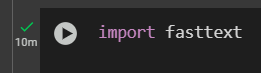

In [ ]:
# Load the updated FastText model
model = fasttext.load_model("updated_fasttext.bin")

word = "love"

# Get 10 most similar words
similar_words = model.get_nearest_neighbors(word, k=10)

# Print the results
for similarity, similar_word in similar_words:
    print(f"{similar_word}: {similarity:.4f}")


loveee: 0.8696
loveeee: 0.8410
amazing: 0.8282
awesome: 0.8272
loveeeee: 0.8184
amazinggg: 0.8026
great: 0.8002
loveeeeee: 0.7949
amazingggg: 0.7804
loveeeeeee: 0.7722


In [ ]:
import numpy as np

In [ ]:
model = fasttext.load_model("updated_fasttext.bin")

word = "love"  # Example

# Get the word vector and negate it
negated_vector = -model.get_word_vector(word)

# Find 10 words closest to the negated vector
# Instead of using get_nearest_neighbors directly with the negated vector,
# we'll use get_nearest_neighbors with the original word and then find the opposites
# based on cosine similarity to the negated vector.
similar_words = model.get_nearest_neighbors(word, k=1000)  # Get a larger set of similar words

opposite_words = []
for similarity, similar_word in similar_words:
    # Calculate cosine similarity between similar word vector and negated vector
    similar_word_vector = model.get_word_vector(similar_word)
    cosine_similarity = negated_vector.dot(similar_word_vector) / (np.linalg.norm(negated_vector) * np.linalg.norm(similar_word_vector))

    opposite_words.append((cosine_similarity, similar_word))

# Sort by cosine similarity in descending order (most opposite first)
opposite_words.sort(key=lambda item: item[0], reverse=True)

# Print the top 10 opposite words
for similarity, opposite_word in opposite_words[:10]:
    print(f"{opposite_word}: {similarity:.4f}")

sonora: -0.5136
kahuna: -0.5136
bronzino: -0.5137
wuzzam: -0.5137
serendipity: -0.5138
outa: -0.5138
hiit: -0.5138
angelos: -0.5139
stellar: -0.5139
herr: -0.5140
